# Chap02 - 시작하기 전에: 신경망의 수학적 구성요소

## 2.1 신경망과의 첫 만남

In [3]:
import tensorflow as tf

tf.keras.__version__

'2.1.6-tf'

### 2.1.1 MNIST 분류기 구현

#### 1) Data Load

In [33]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print('train_images.shape :', train_images.shape)
print('train_labels.shape :', train_labels.shape)
print('test_images.shape :', test_images.shape)
print('test_labels.shape :', test_labels.shape)

train_images.shape : (60000, 28, 28)
train_labels.shape : (60000,)
test_images.shape : (10000, 28, 28)
test_labels.shape : (10000,)


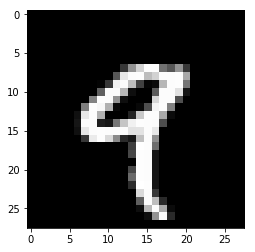

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap='gray');

In [35]:
# pre-processing
train_images = train_images.reshape([-1, 28*28])
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape([-1, 28*28])
test_images = test_images.astype('float32') / 255

print('train_images.shape :', train_images.shape)
print('train_labels.shape :', train_labels.shape)
print('test_images.shape :', test_images.shape)
print('test_labels.shape :', test_labels.shape)

train_images.shape : (60000, 784)
train_labels.shape : (60000,)
test_images.shape : (10000, 784)
test_labels.shape : (10000,)


#### 2) Classifier

In [38]:
from tensorflow.keras import models
from tensorflow.keras import layers

# model
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

# compile
network.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# summary
# network.get_input_shape_at(0)
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


#### 3) Training

In [45]:
# Train
network.fit(x=train_images, y=train_labels, epochs=5, batch_size=128)  # batch_size : default=32

Epoch 1/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.2531 - acc: 0.9273
Epoch 2/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.1026 - acc: 0.9696
Epoch 3/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.0671 - acc: 0.9796
Epoch 4/5
60000/60000 [==============================] - 2s 42us/step - loss: 0.0490 - acc: 0.9854
Epoch 5/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.0368 - acc: 0.9892


#### 4) Evaluating

In [47]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss : {:.5f}, test_acc : {}'.format(test_loss, test_acc))

10000/10000 [==============================] - 0s 50us/step
test_loss : 0.06596, test_acc : 0.9809


## 2.2 신경망을 위한 데이터 표현